In [1]:
import numpy as np
from scipy.linalg import expm
import afqmc
import importlib

importlib.reload(afqmc)
from afqmc import *

In [2]:
# 使用例
U = 4
mu = U / 2
L = 100
N = 10
size = N * N
# s = -np.ones((L, N))
# sはL×Nの行列で、要素は1か-1
s = np.random.choice([-1, 1], size=(L, size))
p = {"N": N, "L": L, "beta": 5, "t": 1.0, "U": U, "mu": mu, "s": s, "dimension": 2}
afqmc = AFQMC(**p)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 10)

In [ ]:
n_stab = 5
M = 10
Szz_x = np.zeros(N)
for m in range(M):
    print(m)
    for l in reversed(range(L)):
        if l % n_stab == 0:
            afqmc.stabilize(l)
        afqmc.i_sweep(l)
        afqmc.time_update_green_function(l)
    if m > 3:
        Szz_x += np.array([afqmc.Szz(i) for i in range(N)])
Szz_x /= M - 4

0
1
2
3
4
5
6
7
8
9


In [ ]:
import matplotlib.pyplot as plt

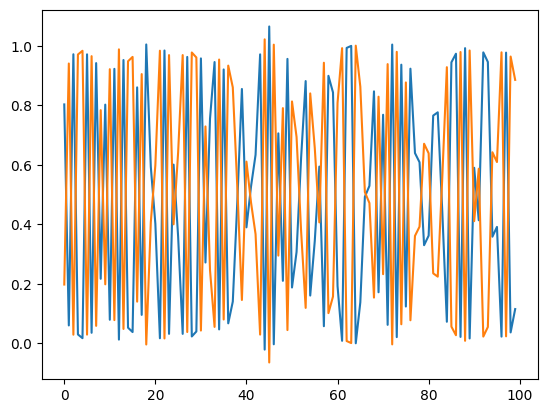

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.diag(afqmc.G_up[L - 1]))
ax.plot(np.diag(afqmc.G_dn[L - 1]))

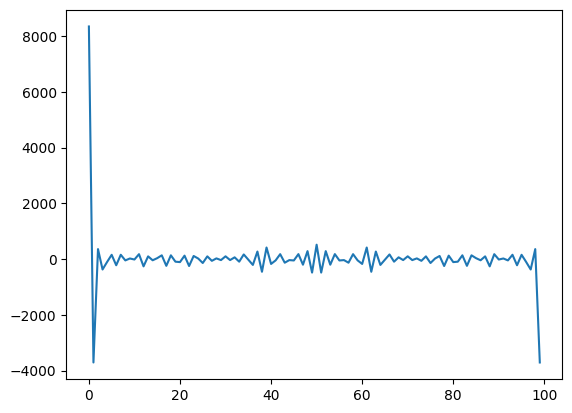

In [ ]:
fig, ax = plt.subplots()
ax.plot(Szz_x)